In [1]:
import pandas as pd
import numpy as np

# Loading the dataset

In [2]:
df = pd.read_csv('bankDetails.csv')
df.head(5)

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [3]:
from pandas_profiling import ProfileReport

In [9]:
report = ProfileReport(df, title = "EDA Report", dark_mode = True, html = {'style' : {'full_width' : True}})

TypeError: describe_unique_1d() got an unexpected keyword argument 'title'

In [11]:
my_tab = pd.crosstab(index=df["Gender"], columns="Frequency", colnames=[" "])
my_tab

,Frequency
Gender,
Female,29764
Male,39948


# Deriving Age from DOB

In [3]:
import datetime

In [4]:
year = datetime.datetime.today().year

In [5]:
summ = 0
count = 0

def convert_age_from_DOB(df):
    global summ
    global count
    age = []

    for ele in df['DOB']:
        
        if type(ele) == str:
            temp = int(ele[-2 : ])
            if temp <= 30:
                temp += 2000
            else:
                temp += 1900

            temp  = year - temp
            age.append(temp)

            count += 1
            summ += temp
        else:
            age.append(-1)
            
    return age

age = convert_age_from_DOB(df)
mean = summ / count

In [6]:
age_final = []

for sarthak in age:
    
    if sarthak == -1:
        age_final.append(mean)
    else :
        age_final.append(sarthak)
        
print([ele for ele in age_final if ele == -1])

[]


In [7]:
df.insert(4, "Age", [int(ele) for ele in age_final])
df

,ID,Gender,DOB,Lead_Creation_Date,Age,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,43,C10001,A,COM0044082,A,4.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,36,C10003,A,COM0000002,C,1.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,40,C10125,C,COM0005267,C,4.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,33,C10477,C,COM0004143,A,4.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,37,C10002,A,COM0001781,A,4.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69708,APPU90955789628,Female,31/07/83,30/09/16,39,C10006,A,COM0000010,A,1.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,10,0
69709,APPV80989824738,Female,27/01/71,30/09/16,51,C10116,C,COM0045789,A,4.0,...,N,S122,G,1450.0,NaN,NaN,NaN,NaN,7,0
69710,APPW50697209842,Female,01/02/92,30/09/16,30,C10022,B,COM0013284,C,4.0,...,Y,S122,G,0.0,24000.0,4.0,35.50,943.0,2,0
69711,APPY50870035036,Male,27/06/78,30/09/16,44,C10002,A,COM0000098,C,3.0,...,Y,S122,G,1366.0,80000.0,5.0,NaN,NaN,10,0


In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

Percentage of approved females are 0.8332213412175783 and Number of males approved are 1.9325122659457294


<AxesSubplot:xlabel='Gender', ylabel='count'>

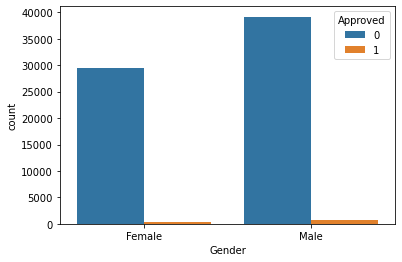

In [5]:
num_females = len([ele for ele in df['Gender'] if ele == 'Female'])
num_males = len([ele for ele in df['Gender'] if ele == 'Male'])

num_females_approved = 0

for count, ele in enumerate(df['Approved']):
    if ele == 1 and df['Gender'][count] == 'Female':
        num_females_approved += 1

num_males_approved = 0

for count, ele in enumerate(df['Approved']):
    if ele == 1 and df['Gender'][count] == 'Male':
        num_males_approved += 1


print(f"Percentage of approved females are {(num_females_approved / num_females) * 100} and Number of males approved are {(num_males_approved / num_males) * 100}")


sns.countplot(x ='Gender', hue = "Approved", data = df)

In [6]:
df.loc[ : , 'Monthly_Income']

0         2000.0
1         3500.0
2         2250.0
3         3500.0
4        10000.0
          ...   
69707     4900.0
69708     7190.1
69709     1600.0
69710     9893.0
69711     4230.0
Name: Monthly_Income, Length: 69712, dtype: float64

## Filling out the NULL values

In [12]:
df.isna().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
Age                                        0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved  

In [13]:
df.fillna(df.median(), inplace=True)

In [14]:
list_of_col = df.columns.to_list()

In [15]:
df2 = df.drop([col for col in list_of_col if df[col].isna().sum() != 0], axis = 1)

In [16]:
df2.isna().sum()

ID                    0
Gender                0
Lead_Creation_Date    0
Age                   0
Employer_Category2    0
Monthly_Income        0
Contacted             0
Source                0
Source_Category       0
Existing_EMI          0
Loan_Amount           0
Loan_Period           0
Interest_Rate         0
EMI                   0
Var1                  0
Approved              0
dtype: int64

array([[<AxesSubplot:title={'center':'Monthly_Income'}>]], dtype=object)

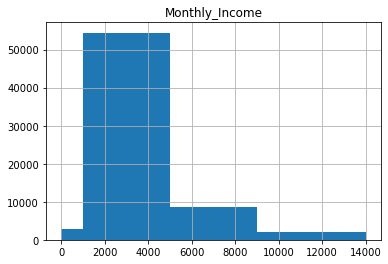

In [17]:
df.hist(column = 'Monthly_Income', bins = [0, 1000, 5000, 9000, 14000])

In [18]:
df_cleaned_income = df2.drop([count for count, ele in enumerate(df2['Monthly_Income']) if ele > 20000], axis = 0)

Text(0, 0.5, 'Approved')

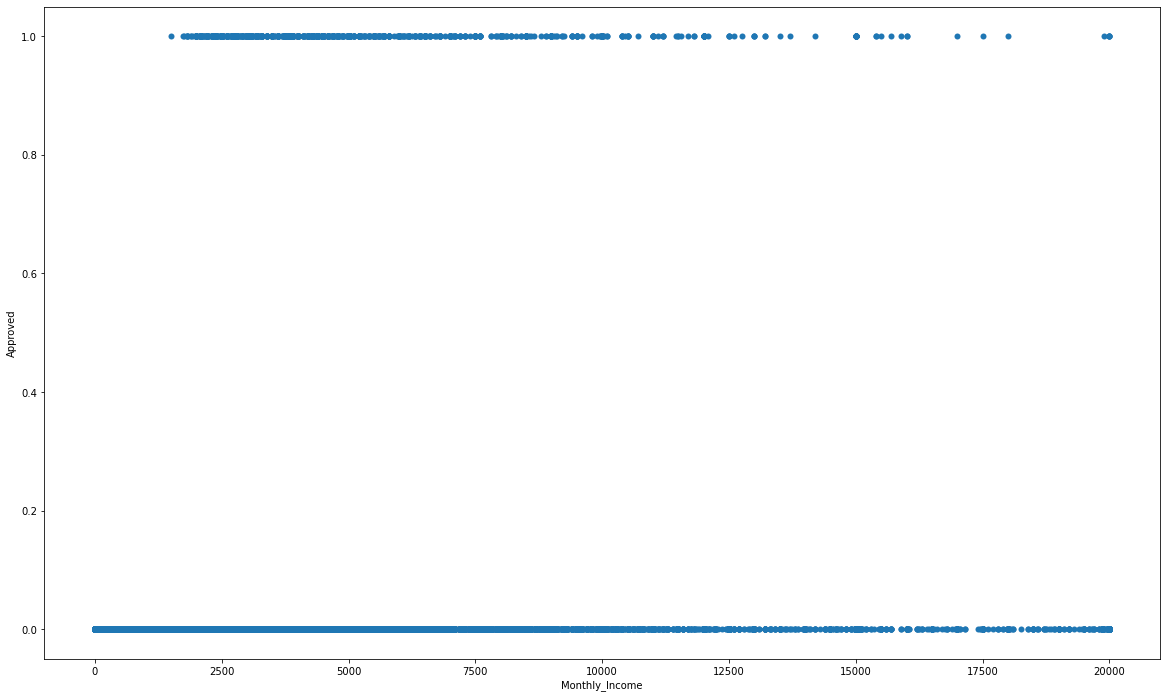

In [19]:
x = df_cleaned_income['Monthly_Income']
y = df_cleaned_income['Approved']

plt.rcParams["figure.figsize"] = (20,12)
plt.scatter(x, y, linewidths = 0.01)
plt.xlabel("Monthly_Income")
plt.ylabel('Approved')


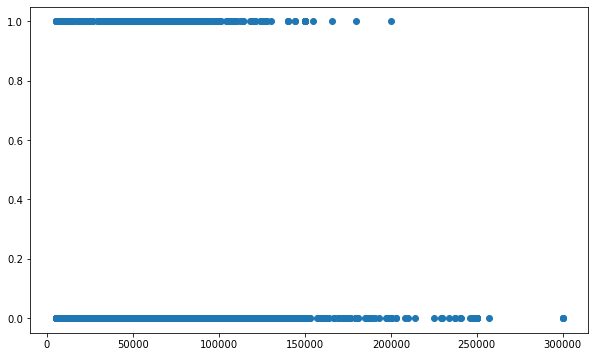

In [20]:
x = df_cleaned_income['Loan_Amount']

plt.rcParams["figure.figsize"] = (10, 6)
plt.scatter(x, y)

array([[<AxesSubplot:title={'center':'Monthly_Income'}>]], dtype=object)

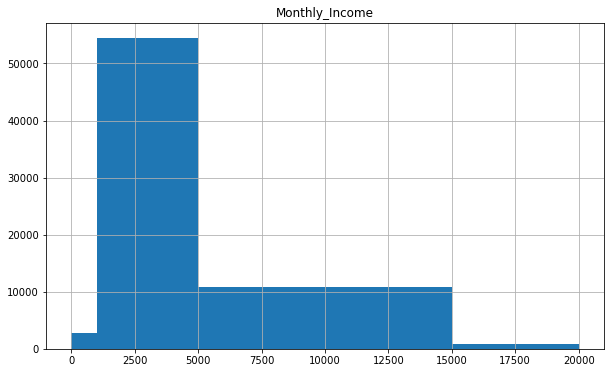

In [21]:
df.hist(column = 'Monthly_Income', bins = [0, 1000, 5000, 15000, 20000])

## Data Wrangling

In [22]:
import sklearn

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  69713 non-null  object 
 1   Gender              69713 non-null  object 
 2   Lead_Creation_Date  69713 non-null  object 
 3   Age                 69713 non-null  int64  
 4   Employer_Category2  69713 non-null  float64
 5   Monthly_Income      69713 non-null  float64
 6   Contacted           69713 non-null  object 
 7   Source              69713 non-null  object 
 8   Source_Category     69713 non-null  object 
 9   Existing_EMI        69713 non-null  float64
 10  Loan_Amount         69713 non-null  float64
 11  Loan_Period         69713 non-null  float64
 12  Interest_Rate       69713 non-null  float64
 13  EMI                 69713 non-null  float64
 14  Var1                69713 non-null  int64  
 15  Approved            69713 non-null  int64  
dtypes: f

In [24]:
df3 = pd.concat([df, pd.get_dummies(df['Gender'], drop_first = True)], axis = 1)

In [25]:
df3.drop(['Gender'], axis = 1, inplace = True)

In [26]:
list_IDS = df3['ID']
list_DOB = df3['DOB']
list_Lead_Creation_Date = df3['Lead_Creation_Date']
list_City_Code = df3['City_Code']
list_City_Category = df3['City_Category']
list_Employer_Code = df3['Employer_Code']
list_Employer_Category1 = df3['Employer_Category1']
list_Employer_Category2 = df3['Employer_Category2']
list_Source = df3['Source']
list_Source_Category = df3['Source_Category']

In [27]:
df3.drop(['ID', 'DOB', 'Lead_Creation_Date', 'City_Code', 'City_Category', 'Employer_Code', 'Employer_Category1', 'Source'], axis = 1, inplace = True)

In [28]:
df3.drop(['Customer_Existing_Primary_Bank_Code', 'Employer_Category2'], axis = 1, inplace = True)

In [29]:
df3.drop(['Primary_Bank_Type'], axis = 1, inplace = True)

In [30]:
df3.drop(['Contacted'], axis = 1, inplace = True)

In [31]:
df3

,Age,Monthly_Income,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Male
0,43,2000.0,G,0.0,30000.0,4.0,18.00,941.0,0,0,0
1,36,3500.0,G,0.0,20000.0,2.0,13.25,953.0,10,0,1
2,40,2250.0,B,0.0,45000.0,4.0,18.00,941.0,0,0,1
3,33,3500.0,B,0.0,92000.0,5.0,18.00,941.0,7,0,1
4,37,10000.0,B,2500.0,50000.0,2.0,18.00,941.0,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
69708,39,4900.0,G,0.0,30000.0,4.0,18.00,941.0,10,0,0
69709,51,7190.1,G,1450.0,30000.0,4.0,18.00,941.0,7,0,0
69710,30,1600.0,G,0.0,24000.0,4.0,35.50,943.0,2,0,0
69711,44,9893.0,G,1366.0,80000.0,5.0,18.00,941.0,10,0,1


In [32]:
df3.drop(['Source_Category'], axis = 1, inplace = True)

In [33]:
df3.drop(['Var1'], axis = 1, inplace = True)

In [34]:
df3

,Age,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Approved,Male
0,43,2000.0,0.0,30000.0,4.0,18.00,941.0,0,0
1,36,3500.0,0.0,20000.0,2.0,13.25,953.0,0,1
2,40,2250.0,0.0,45000.0,4.0,18.00,941.0,0,1
3,33,3500.0,0.0,92000.0,5.0,18.00,941.0,0,1
4,37,10000.0,2500.0,50000.0,2.0,18.00,941.0,0,1
...,...,...,...,...,...,...,...,...,...
69708,39,4900.0,0.0,30000.0,4.0,18.00,941.0,0,0
69709,51,7190.1,1450.0,30000.0,4.0,18.00,941.0,0,0
69710,30,1600.0,0.0,24000.0,4.0,35.50,943.0,0,0
69711,44,9893.0,1366.0,80000.0,5.0,18.00,941.0,0,1


# Finding the correlation between different columns and APPROVED column

In [35]:
correlation1 = df_cleaned_income[['Loan_Amount', 'Monthly_Income', 'Loan_Period', 'Age', 'Approved']].corr()
correlation1.style.background_gradient(cmap='coolwarm').set_precision(2)

,Loan_Amount,Monthly_Income,Loan_Period,Age,Approved
Loan_Amount,1.00,0.40,0.37,0.11,0.05
Monthly_Income,0.40,1.00,-0.04,0.22,0.10
Loan_Period,0.37,-0.04,1.00,0.04,-0.00
Age,0.11,0.22,0.04,1.00,0.04
Approved,0.05,0.10,-0.00,0.04,1.00


# Training of the model

In [36]:
y = df3['Approved']

In [37]:
df3.drop(['Approved'], axis = 1, inplace=True)

In [38]:
ls1 = df3.columns.to_list()
x = df3[ls1]
x.shape

(69713, 8)

# KNeighborsClassifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
from sklearn import tree

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=42)

In [81]:
x_train

,Age,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Male
65220,41,4300.0,0.0,10000.0,3.0,14.5,344.0,1
1152,37,6600.0,0.0,130000.0,4.0,13.0,3488.0,1
13960,67,3500.0,1400.0,30000.0,4.0,18.0,941.0,0
52660,40,5822.2,0.0,30000.0,4.0,18.0,941.0,0
10989,31,2500.0,500.0,30000.0,5.0,17.0,746.0,1
...,...,...,...,...,...,...,...,...
37194,34,1600.0,0.0,26000.0,4.0,18.0,941.0,1
6265,27,1800.0,1500.0,30000.0,4.0,18.0,941.0,0
54886,42,8000.0,0.0,30000.0,4.0,18.0,941.0,0
860,38,1250.0,0.0,30000.0,4.0,18.0,941.0,0


In [82]:
model1 = KNeighborsClassifier(n_neighbors=5)

In [83]:
model1.fit(x_train, y_train)

KNeighborsClassifier()

In [84]:
predictions = model1.predict(x_test)

In [85]:
count = 0
y_test = np.array(y_test)

for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        count += 1
        
print("The accuracy of the model is ", (count / len(predictions) * 100))

The accuracy of the model is  98.45079850817633


# Decision Tree Classifier

In [86]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [87]:
predictions2 = clf.predict(x_test)

In [88]:
count = 0
y_test = np.array(y_test)

for i in range(len(predictions2)):
    if predictions2[i] == y_test[i]:
        count += 1
print(count, len(predictions2))
print("The accuracy of the model is ", (count / len(predictions2) * 100))

20304 20914
The accuracy of the model is  97.08329348761595


# Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
clf2 = RandomForestClassifier(n_estimators = 1000) 
clf2.fit(x, y)

RandomForestClassifier(n_estimators=1000)

In [91]:
count = 0
y_test = np.array(y_test)

for i in range(len(predictions2)):
    if predictions2[i] == y_test[i]:
        count += 1
        
print("The accuracy of the model is ", (count / len(predictions2) * 100))

The accuracy of the model is  97.08329348761595


# Importing the test data

In [53]:
test_data = pd.read_csv('bankDetails_test.csv')

In [54]:
test_data

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1
0,APPA70109647212,Male,03/06/88,05/07/16,C10028,C,COM0002222,A,4.0,2150.0,...,P,Y,S122,B,0.0,10000.0,3.0,20.0,372.0,4
1,APPB10687939341,Male,13/07/81,01/07/16,C10003,A,COM0001784,C,4.0,4200.0,...,P,Y,S133,C,0.0,69000.0,5.0,24.0,1985.0,7
2,APPC80449411414,Female,19/11/90,01/07/16,C10009,B,COM0045260,B,4.0,1000.0,...,P,N,S133,B,0.0,NaN,NaN,NaN,NaN,0
3,APPD30665094501,Female,15/10/92,01/07/16,C10005,A,COM0000085,A,3.0,1465.0,...,P,N,S133,C,0.0,NaN,NaN,NaN,NaN,0
4,APPE80379821637,Male,21/09/88,01/07/16,C10005,A,COM0006422,A,4.0,2340.0,...,P,Y,S143,B,500.0,10000.0,2.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30032,APPH10161458941,Male,19/11/80,30/09/16,C10004,A,COM0000490,C,4.0,1240.0,...,G,Y,S122,G,0.0,20000.0,4.0,31.5,738.0,2
30033,APPK90372617208,Male,23/08/93,30/09/16,C10014,B,COM0032434,A,4.0,2000.0,...,G,Y,S122,G,0.0,32000.0,4.0,NaN,NaN,2
30034,APPL30263849328,Female,01/07/90,30/09/16,C10002,A,COM0016561,A,4.0,1000.0,...,P,N,S122,G,350.0,NaN,NaN,NaN,NaN,0
30035,APPM70251572449,Female,27/02/73,30/09/16,C10177,C,COM0000351,A,4.0,4000.0,...,G,N,S122,G,1000.0,NaN,NaN,NaN,NaN,7


In [55]:
test_data['Interest_Rate'] = test_data['Interest_Rate'].fillna(df['Interest_Rate'].median())

In [56]:
test_data = test_data.fillna(test_data.median())

In [57]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30037 entries, 0 to 30036
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   30037 non-null  object 
 1   Gender                               30037 non-null  object 
 2   DOB                                  30034 non-null  object 
 3   Lead_Creation_Date                   30037 non-null  object 
 4   City_Code                            29723 non-null  object 
 5   City_Category                        29723 non-null  object 
 6   Employer_Code                        28432 non-null  object 
 7   Employer_Category1                   28432 non-null  object 
 8   Employer_Category2                   30037 non-null  float64
 9   Monthly_Income                       30037 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  26000 non-null  object 
 11  Primary_Bank_Type           

In [58]:
age_test = convert_age_from_DOB(test_data)

In [59]:
test_data.insert(4, "Age", age_test)

In [60]:
test_data

,ID,Gender,DOB,Lead_Creation_Date,Age,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,...,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1
0,APPA70109647212,Male,03/06/88,05/07/16,34,C10028,C,COM0002222,A,4.0,...,P,Y,S122,B,0.0,10000.0,3.0,20.0,372.0,4
1,APPB10687939341,Male,13/07/81,01/07/16,41,C10003,A,COM0001784,C,4.0,...,P,Y,S133,C,0.0,69000.0,5.0,24.0,1985.0,7
2,APPC80449411414,Female,19/11/90,01/07/16,32,C10009,B,COM0045260,B,4.0,...,P,N,S133,B,0.0,30000.0,4.0,18.0,946.0,0
3,APPD30665094501,Female,15/10/92,01/07/16,30,C10005,A,COM0000085,A,3.0,...,P,N,S133,C,0.0,30000.0,4.0,18.0,946.0,0
4,APPE80379821637,Male,21/09/88,01/07/16,34,C10005,A,COM0006422,A,4.0,...,P,Y,S143,B,500.0,10000.0,2.0,18.0,946.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30032,APPH10161458941,Male,19/11/80,30/09/16,42,C10004,A,COM0000490,C,4.0,...,G,Y,S122,G,0.0,20000.0,4.0,31.5,738.0,2
30033,APPK90372617208,Male,23/08/93,30/09/16,29,C10014,B,COM0032434,A,4.0,...,G,Y,S122,G,0.0,32000.0,4.0,18.0,946.0,2
30034,APPL30263849328,Female,01/07/90,30/09/16,32,C10002,A,COM0016561,A,4.0,...,P,N,S122,G,350.0,30000.0,4.0,18.0,946.0,0
30035,APPM70251572449,Female,27/02/73,30/09/16,49,C10177,C,COM0000351,A,4.0,...,G,N,S122,G,1000.0,30000.0,4.0,18.0,946.0,7


In [61]:
test_data = pd.concat([test_data, pd.get_dummies(test_data['Gender'], drop_first = True)], axis = 1)

In [62]:
test_data.drop(['Gender'], axis = 1, inplace = True)

In [63]:
test_data.drop(['ID', 'DOB', 'Lead_Creation_Date', 'City_Code', 'City_Category', 'Employer_Code', 'Employer_Category1', 'Source'], axis = 1, inplace = True)

In [64]:
test_data.drop(['Customer_Existing_Primary_Bank_Code', 'Employer_Category2', 'Primary_Bank_Type', 'Var1'], axis = 1, inplace = True)

In [65]:
test_data.drop(['Source_Category', 'Contacted'], axis = 1, inplace = True)

In [113]:
predictions_on_test_data = model1.predict(test_data)
# x_train.shape, test_data.shape
print(predictions_on_test_data[ : 1000])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [114]:
approved_list = [ele for ele in predictions_on_test_data if ele == 1]
len(approved_list)

14